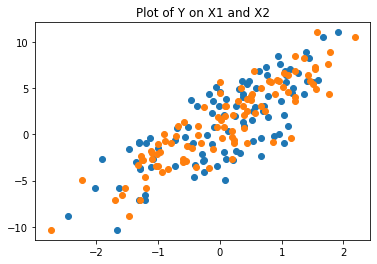

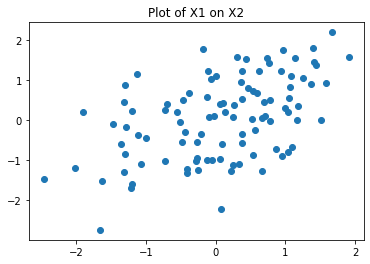

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import distplot 

def genData(N,alpha,beta1,beta2,rho):
    beta = np.array([beta1,beta2]).reshape(-1,1)
    error = np.random.normal(size = (N,1))
    cov = [[1,rho],[rho,1]]
    X = np.random.multivariate_normal([0,0], cov, size = N, check_valid = 'warn', tol = 1e-8)
    y = alpha + X@beta + error
    return y, X

y, X = genData(100,1,2,3,0.5)

plt.figure()
plt.scatter(X[:,0],y)
plt.scatter(X[:,1],y)
plt.title('Plot of Y on X1 and X2')
plt.show()

plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.title('Plot of X1 on X2')
plt.show()

Mean of beta_1 is: 2.0839889902800213
Mean of beta_2 is: 2.918811038099385


/Users/nicolasmartorell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nicolasmartorell/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

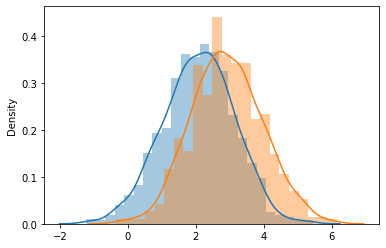

In [16]:
N = 100
S = 1000
beta_res = np.zeros(shape = (S,2))
rho = 0.99
for i in range(S):
    y, X = genData(N,1,2,3,rho)
    beta = np.linalg.inv(X.T@X)@X.T@y
    beta_res[i,:] = beta.T

print('Mean of beta_1 is:', np.mean(beta_res[:,0]))
print('Mean of beta_2 is:', np.mean(beta_res[:,1]))
distplot(beta_res[:,0])
distplot(beta_res[:,1])